In [1]:
import tensorflow as tf

print(tf.__version__)


2.15.0


# additional import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load the data set

In [9]:
fashion_mnist= tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()
X_train, X_test= X_train / 255.0, X_test/ 255.0
print("x_train.shape: ",X_train.shape)

x_train.shape:  (60000, 28, 28)


In [10]:
# the data is only 2D
# convolution expects height x width x color

X_train= np.expand_dims(X_train,-1)
X_test= np.expand_dims(X_test,-1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# number of classes

K=  len(set(y_train))
print("number of classes: ",K)

# Build the CNN model using the functional API

In [14]:
# i is the input
# x is the output

i= Input(shape= X_train[0].shape)

x= Conv2D(32,(3,3), strides=2, activation='relu')(i)
x= Conv2D(64,(3,3), strides=2, activation='relu')(x)
x= Conv2D(128,(3,3), strides=2, activation='relu')(x)

x= Flatten()(x)
x= Dropout(0.2)(x)
x= Dense(521, activation='relu')(x)
x= Dropout(0.2)(x)
x= Dense(K, activation='softmax')(x)

model= Model(i,x)

# Compile and fit

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

r=model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=15)

Epoch 1/15


1875/1875 [==============================] - 14s 7ms/step - loss: 0.5187 - accuracy: 0.8083 - val_loss: 0.4036 - val_accuracy: 0.8441
Epoch 2/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3600 - accuracy: 0.8642 - val_loss: 0.3592 - val_accuracy: 0.8667
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3098 - accuracy: 0.8835 - val_loss: 0.3130 - val_accuracy: 0.8837
Epoch 4/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2795 - accuracy: 0.8946 - val_loss: 0.3164 - val_accuracy: 0.8866
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2530 - accuracy: 0.9040 - val_loss: 0.2949 - val_accuracy: 0.8932
Epoch 6/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2307 - accuracy: 0.9127 - val_loss: 0.2973 - val_accuracy: 0.8926
Epoch 7/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2120 - accuracy: 0.9196 - val_loss: 0.2890 - val_

# Loss per iteration

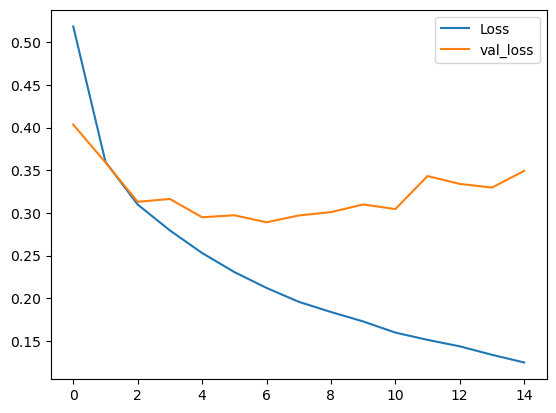

In [17]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

# accuracy per iteration

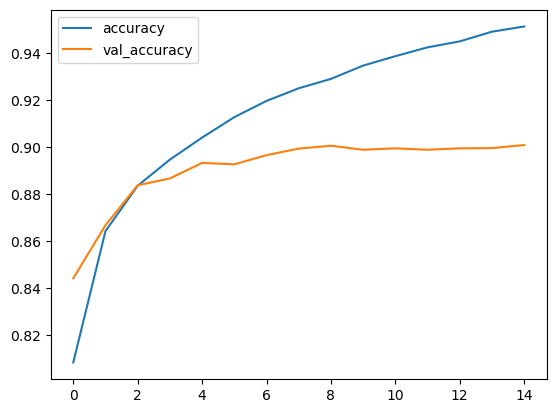

In [19]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# show some missclassified sample

In [23]:
from sklearn.metrics import confusion_matrix

p_test= model.predict(X_test).argmax(axis=1)
cm= confusion_matrix(y_test, p_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
# Label mapping

labels=''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

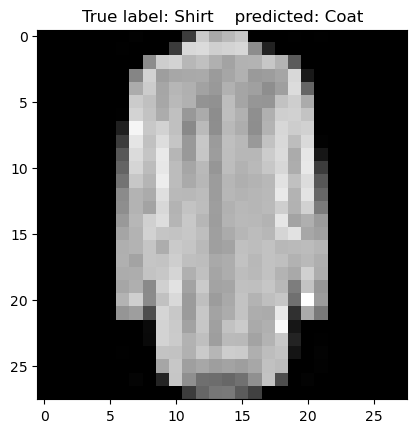

In [34]:
missclassified_idx= np.where(p_test != y_test)[0]
i= np.random.choice(missclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s    predicted: %s" % (labels[y_test[i]], labels[p_test[i]]) );